In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
mnist = pd.read_csv("mnist.csv")

In [4]:
# 1. Load, Prepare MNIST data

# save label into variable mnist_label
mnist_label = mnist['label']

# remove label from the dataset and store the pixel data in mnist_data variable
mnist_data = mnist.drop("label",axis=1)

In [5]:
print(mnist_data.shape)
print(mnist_label.shape)

(60000, 784)
(60000,)


In [5]:
# 1. Standardize the MNIST data


# this is done by taking each column of data, subtracting it from the mean of the variable and dividing it by the standard deviation
# this is done to standardize the data with mean = 0 and standard deviation = 1

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(mnist_data)

print(standardized_data.shape)

(60000, 784)


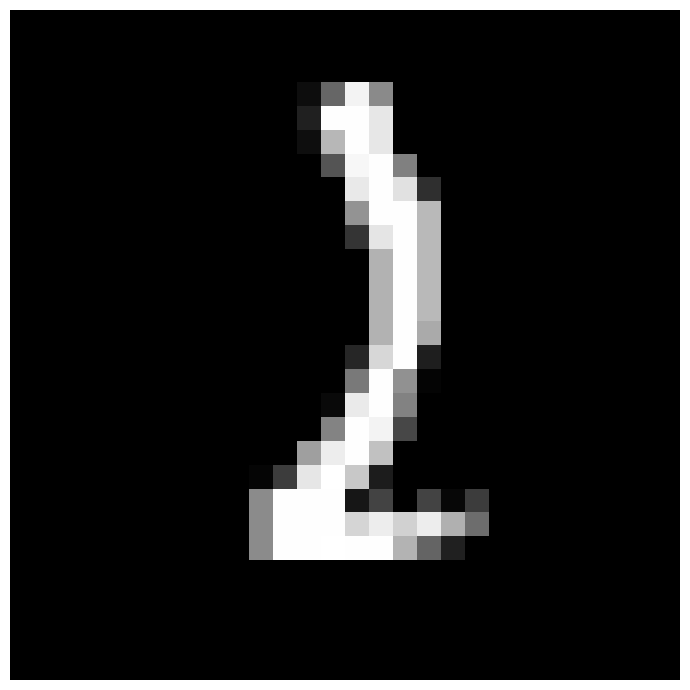

2


In [6]:
#  2. visualize an image from the dataset




plt.figure(figsize=(7,7))
data_row = 180

# get the data from the data row, convert it into a matrix and reshape the matrix to 28 by 28 matrix
# then use matplot lip to show the image, and the colour map should be gray because we want a greyscale image 

image_data = mnist_data.iloc[data_row].to_numpy().reshape(28,28)
plt.imshow(image_data, cmap='gray')

plt.axis('off')
plt.tight_layout()
plt.show()

print(mnist_label[data_row])


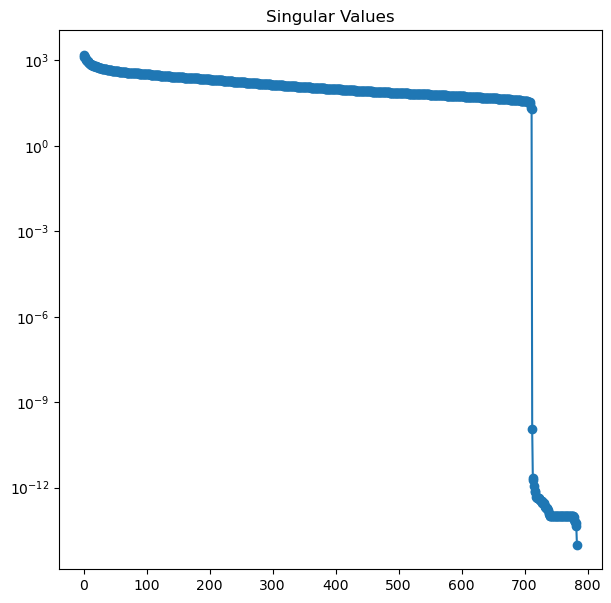

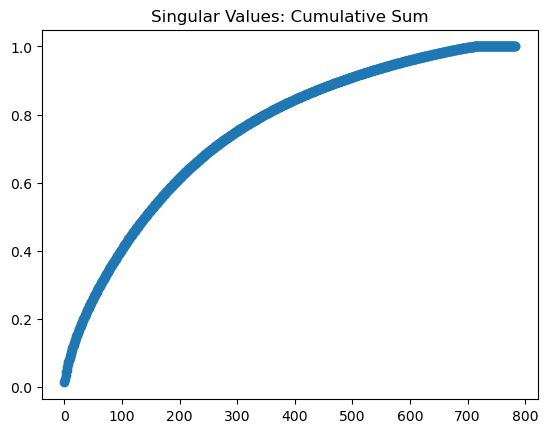

In [7]:
# 2. Apply SVD


# compute SVD (X = U.S.VT) and extract the singular diagonal value from the matrix. SVD for the MINST data should give;
# 784 by 784 V-matrix, a diagonal S-matrix (sigma-matrix), and 784 by 60000 for VT (each row being an eigen with the most values at the top)

U, S, VT = np.linalg.svd(standardized_data,full_matrices=0)
S = np.diag(S)

fig1 = plt.figure(figsize=(7,7))

# log of the diagonal elements of sigma (S)
plt.figure(1)
plt.semilogy(np.diag(S), '-o')
plt.title('Singular Values')
plt.show()

# cumulative sum to show how much variance is captured by the first r-singular vectors
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)), '-o')
plt.title('Singular Values: Cumulative Sum')
plt.show()


# the graph shows the group of a few singular values that capture a huge portion of the variance of the dataset.  

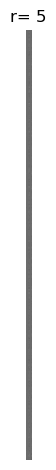

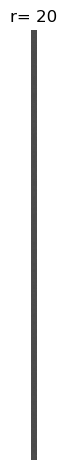

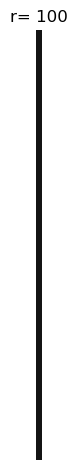

In [8]:

# 4. Reconstructing the compressed image data

# construct lower rank approximation at different ranks
j = 0
for r in (5, 20, 100):
    Xappx = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    plt.imshow(Xappx, cmap='gray')
    plt.axis('off')
    plt.title('r= ' + str(r))
    plt.tight_layout()
    plt.show()

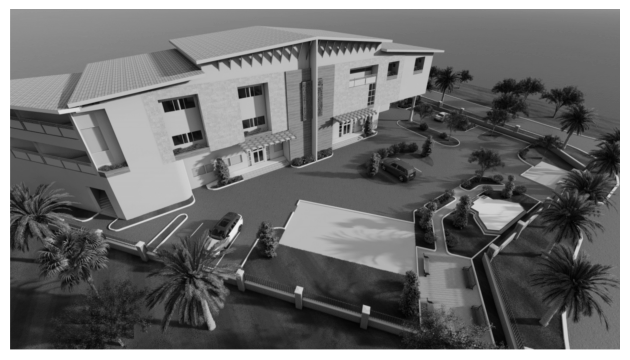

In [9]:

from matplotlib.image import imread

# using an image to properly depict image compression
image_render = imread('house-render.jpg')
image_rendered = np.mean(image_render, -1)
img = plt.imshow(image_rendered)
img.set_cmap('gray')

plt.axis('off')
plt.tight_layout()
plt.show()

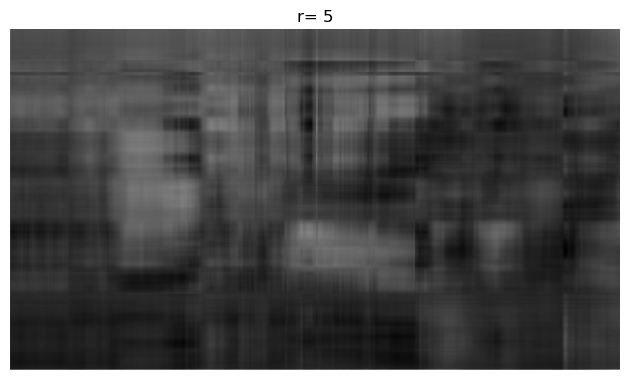

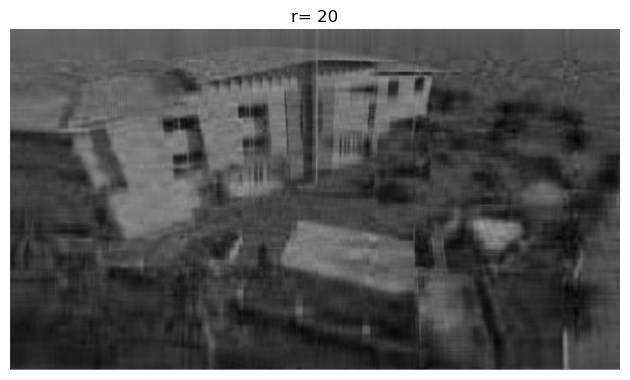

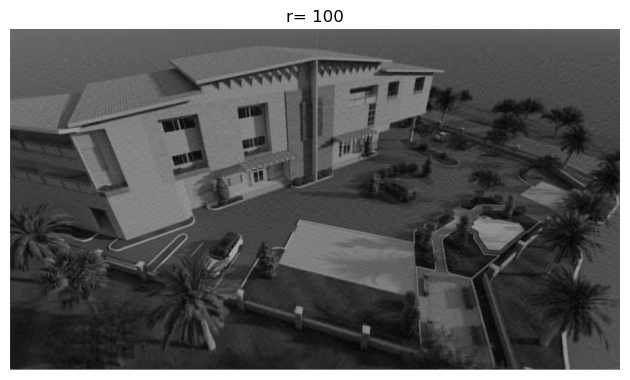

In [10]:

# 4.b. Reconstructing the compressed image data

U, S, VT = np.linalg.svd(image_rendered,full_matrices=0)
S = np.diag(S)

# construct lower rank approximation at different ranks
j = 0
for r in (5, 20, 100):
    Xappx = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    plt.imshow(Xappx, cmap='gray')
    plt.axis('off')
    plt.title('r= ' + str(r))
    plt.tight_layout()
    plt.show()

In [11]:
# 3. Dimensionality Reduction

# work with the standardized MNIST data
# then compute the covariance matrix : A^T * A to help compute the eigen values

s_mnist_data = standardized_data
covariance_matrix = np.matmul(s_mnist_data.T , s_mnist_data)

print("The covariance data has the shape: ", covariance_matrix.shape)

The covariance data has the shape:  (784, 784)


In [12]:
# the computation of the top eigen values and their respective vectors follows;
# the eigh function returns the eigen values in ascending other
# the eigh function selects the two of interested (782, 783) without computing for other eigen values

from scipy.linalg import eigh

e_values, e_vectors = eigh(covariance_matrix, subset_by_index=(782,783))

print("The eigen vectors have the shape: ", e_vectors.shape)
e_vectors = e_vectors.T

print("The eigen vectors transposed to: ", e_vectors.shape)

The eigen vectors have the shape:  (784, 2)
The eigen vectors transposed to:  (2, 784)


In [13]:
# the MNIST data gets projected on the plane with the two eigen vectors by vector multiplication
# the top two were selected because I am trying to project to 2-dimensions

import matplotlib.pyplot as plt

coordinate = np.matmul(e_vectors, s_mnist_data.T)

print("The resulting data points have the shape: ", e_vectors.shape, "X", s_mnist_data.T.shape, "=", coordinate.shape)
print(coordinate.shape)

The resulting data points have the shape:  (2, 784) X (784, 60000) = (2, 60000)
(2, 60000)


In [14]:
import pandas as pd

# add the label to the 2d projected data
k = np.vstack((coordinate, mnist_label)).T

# create new dataframe for plotting the labelled points
dataframe = pd.DataFrame(data=k, columns=("U", "V", "labels"))

# in the printed dataset each row corresponds to a point of data that had 784 dimensions but has been transformed to two dimensions
print(dataframe.head())

          U         V  labels
0 -4.814790 -0.922159     5.0
1 -7.754403  8.708977     0.0
2  9.431338  2.328389     4.0
3 -3.746318 -6.582173     1.0
4  3.133297 -5.183251     9.0


In [15]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as sklearnPCA
pcanalysis = decomposition.PCA()

In [16]:
# running PCA for multiple components
# scikit cuts down the processes ans allows for PCA on multiple components in a more efficient manner

pcanalysis.n_components = 3
pcanalysis_data = pcanalysis.fit_transform(s_mnist_data)
sklearn_pca = sklearnPCA(n_components = 0.99, svd_solver ='full')

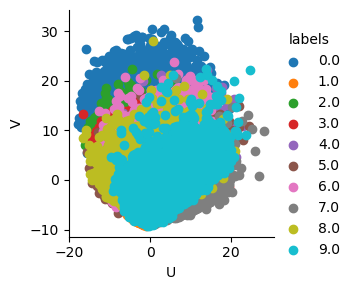

In [17]:
# 5. Visualisations showing the effects of PCA-based compression. 

# plotting of the dat points would be done on 2d using seaborn
import seaborn as sns

# block out warning as a reult of library version
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.FacetGrid(dataframe, hue="labels").map(plt.scatter, 'U', 'V').add_legend()

plt.show()

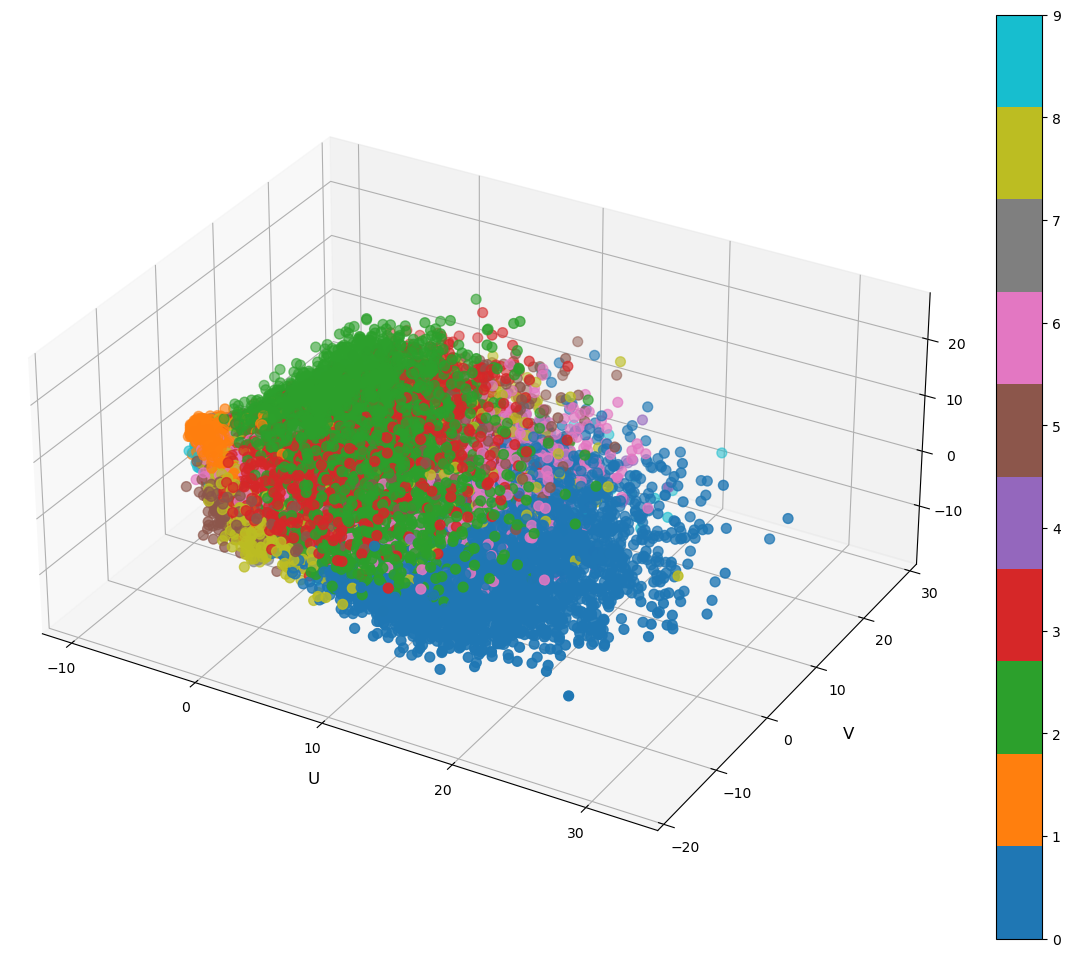

In [18]:

from mpl_toolkits.mplot3d import Axes3D

pcanalysis_plot_data = np.vstack((pcanalysis_data.T, mnist_label)).T

pcanalysis_dataframe = pd.DataFrame(data=pcanalysis_plot_data, columns=("U", "V", "a", "labels"))

# sns.FacetGrid(pcanalysis_dataframe, hue="labels").map(plt.scatter, 'U', 'V').add_legend()


# plot 3 principal components in 3-d

fig = plt.figure(figsize = (16,12))
ax = plt.axes(projection='3d')
pcanalysis_3d = ax.scatter(
    xs=pcanalysis_dataframe['U'], 
    ys=pcanalysis_dataframe['V'], 
    zs=pcanalysis_dataframe['a'], 
    c=pcanalysis_dataframe["labels"], 
    cmap='tab10',s=50
)
ax.set_box_aspect((20, 16, 9))
ax.set_xlabel('U', fontsize=12, labelpad=10)
plt.xticks(size=10)
ax.set_ylabel('V', fontsize=12, labelpad=10)
plt.yticks(size=10)
ax.set_zlabel('a', fontsize=12, labelpad=10)
ax.zaxis.set_tick_params(labelsize=10)

plt.colorbar(pcanalysis_3d)
plt.show()